In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_games = pd.read_csv('dataset/dataset_video_games.csv')

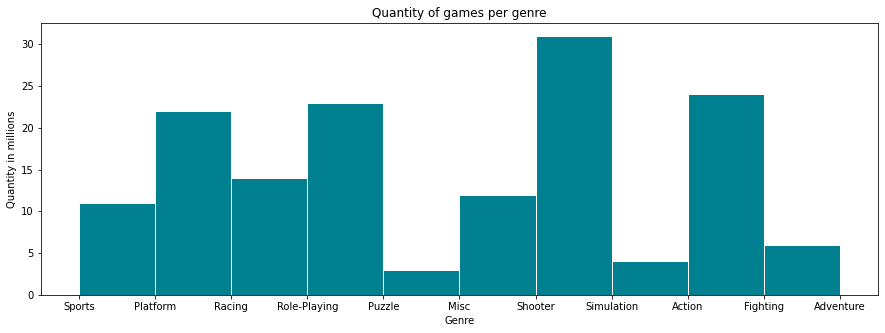

In [3]:
fig, ax = plt.subplots(figsize=(15,5))

plt.hist(x= df_games['Genre'].iloc[0:150],  edgecolor='white', color = '#008091')
plt.title('Quantity of games per genre')
plt.ylabel('Quantity in millions')
plt.xlabel('Genre')

plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='black')
plt.rc('ytick', direction='out', color='black')
plt.rc('lines', linewidth=2)

plt.show()

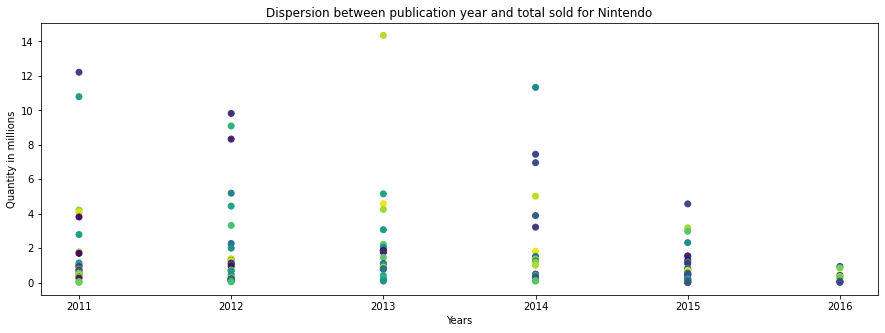

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
df = df_games[(df_games['Year'] > 2010) & (df_games['Publisher'] == 'Nintendo')]

colors = np.random.rand(len(df))
plt.scatter(df['Year'], df['Global_Sales'], c=colors)
plt.title('Dispersion between publication year and total sold for Nintendo')
plt.ylabel('Quantity in millions')
plt.xlabel('Years')
plt.show()

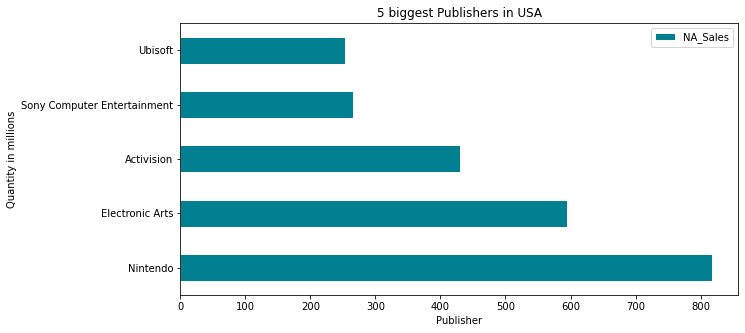

In [5]:
df_games[['Publisher','NA_Sales']].groupby('Publisher').sum().nlargest(5, 'NA_Sales').plot(kind='barh', edgecolor='white', color = "#008091", figsize=(10,5))
plt.title('5 biggest Publishers in USA')
plt.ylabel('Quantity in millions')
plt.xlabel('Publisher')
plt.show()

# Case Netflix

In [142]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_netflix = pd.read_excel('./dataset/dataset_netflix.xlsx', sheet_name='Dataset Netflix')
df_netflix['duration'].value_counts()

1 Season      1321
2 Seasons      304
3 Seasons      158
90 min         111
91 min         104
92 min         101
95 min          94
94 min          94
93 min          90
99 min          88
97 min          88
88 min          86
96 min          85
98 min          83
100 min         80
89 min          78
86 min          77
103 min         75
102 min         74
101 min         71
87 min          70
105 min         70
106 min         70
110 min         69
104 min         62
4 Seasons       61
107 min         60
108 min         56
109 min         50
85 min          50
84 min          50
116 min         49
83 min          48
119 min         47
5 Seasons       46
81 min          46
118 min         45
111 min         43
112 min         41
117 min         40
113 min         40
78 min          39
82 min          38
121 min         37
127 min         36
124 min         36
126 min         35
122 min         33
128 min         33
137 min         33
114 min         33
123 min         32
120 min     

# One hot encode

In [133]:
from random import randint

def justify_country(x):
    if not pd.isna(x):
        data = x.split(',')
#         result = data[randint(0, len(data)-1)]
        return data[randint(0, len(data)-1)]

In [139]:
variables = ['type', 'director', 'cast', 'country', 'release_year', 'duration', 'listed_in']
X = df_netflix[['type', 'duration', 'release_year','duration','country']]
y = df_netflix['rating']
X['country'] = X['country'].apply(justify_country)
X = pd.concat([X, pd.get_dummies(X[['type']])], axis=1)
# test =  pd.concat([test, pd.get_dummies(test['SIGNO'])], axis=1)  
X = X.drop(['type', 'duration'], axis=1)
# X.head()
X['country'].value_counts().to_frame()

<ipython-input-139-5313c0bb10e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = X['country'].apply(justify_country)


,country
United States,2146
India,791
none,476
United Kingdom,401
Japan,179
Canada,167
United States,144
South Korea,139
Spain,129
France,115


In [128]:
np.random.seed(1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_valid)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

## Handle missing values

In [53]:
cols_with_missing = [col for col in df_netflix.columns 
                                 if df_netflix[col].isnull().any()]
cols_with_missing

In [54]:
# X = df_netflix.loc[:, df_netflix.columns != 'rating']
# y = df_netflix['rating']

<AxesSubplot:>

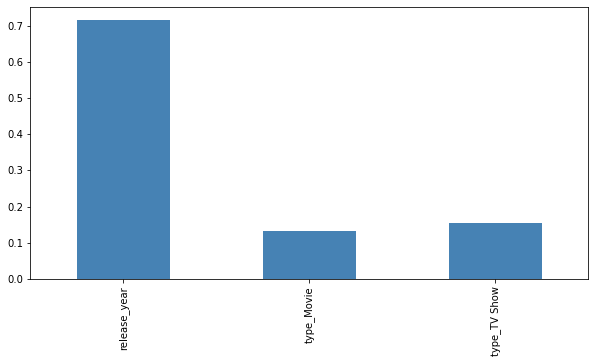

In [55]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X, y)

pd.Series(clf.feature_importances_, index=X.columns[:]).plot.bar(color='steelblue', figsize=(10, 5))